# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
     data = pd.read_csv('C:\\Users\\User\\Documents\\Phyton\\real_estate_data.csv', sep='\t')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data_02 = data.copy()
display(data.head())

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

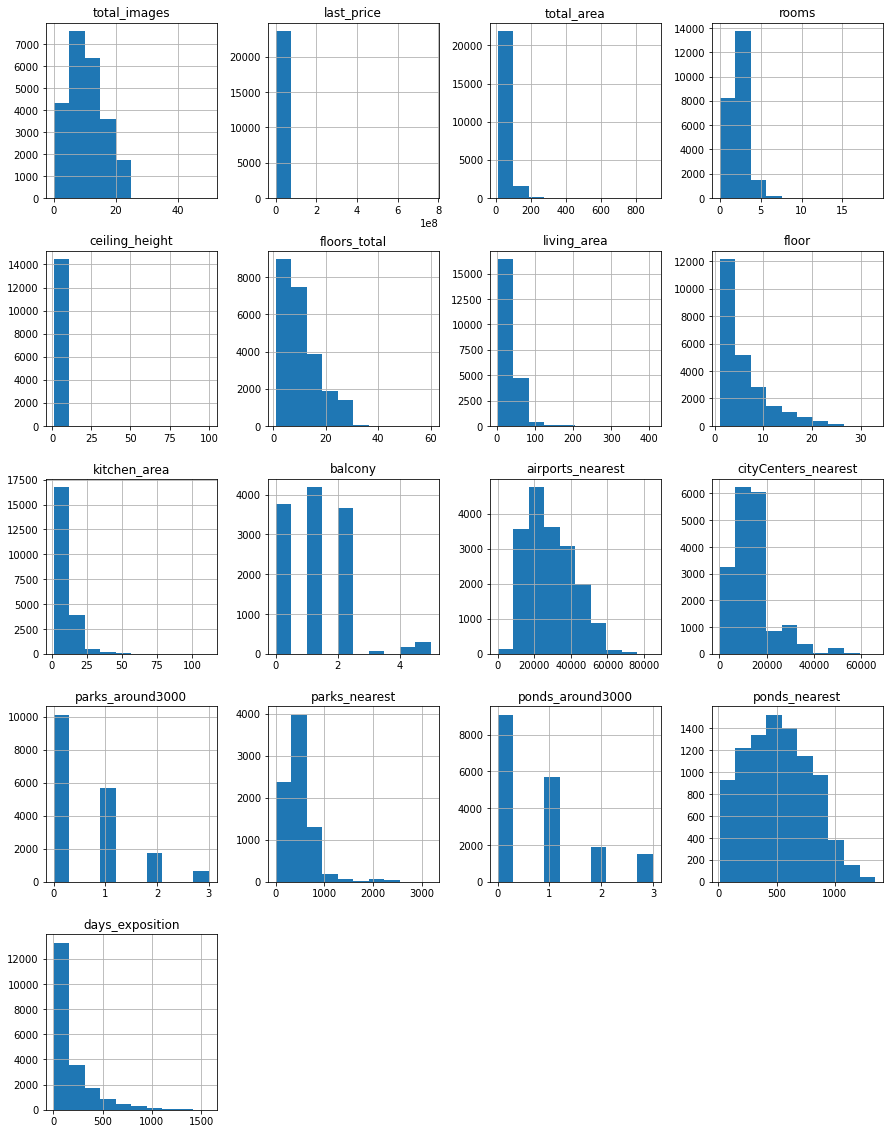

In [3]:
data.hist(figsize=(15, 20));

## Предобработка данных

In [4]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [5]:
data = (
    data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest',
                         'parks_around3000' : 'parks_around_3000',
                         'ponds_around3000' : 'ponds_around_3000'})
)

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
data['living_area'] = data['living_area'].round(0)
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
data['living_area'].sort_values().unique()

array([  2.,   3.,   5.,   6.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,
        70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,
        92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102.,
       103., 104., 105., 106., 107., 108., 109., 110., 111., 112., 113.,
       114., 115., 116., 117., 118., 119., 120., 121., 122., 123., 124.,
       125., 126., 127., 128., 129., 130., 131., 132., 133., 134., 135.,
       136., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       148., 149., 150., 151., 152., 153., 154., 15

In [11]:
data['kitchen_area'] = data['kitchen_area'].round(0)
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))
data['kitchen_area'].sort_values().unique()
x = data['total_area']*0.9 <= data['living_area'] + data['kitchen_area']
print(x.head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


- В столбце площадь кухни и жилая площадь пропуски скорее всего из-за невнимательности людей и носят скорее всего полностью случайный характер. 

In [12]:
# check
data[data['total_area']*0.9 <= data['living_area'] + data['kitchen_area']].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
164,6,800000.0,40.3,2018-06-25T00:00:00,2,NaN,3.0,30.0,1,NaN,...,9.0,2.0,поселок городского типа Ефимовский,NaN,NaN,NaN,NaN,NaN,NaN,81.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9.0,38.0,8,NaN,...,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9.0,26.0,5,NaN,...,6.0,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
195,8,5300000.0,60.0,2016-05-19T00:00:00,3,NaN,9.0,45.0,4,NaN,...,10.0,0.0,Санкт-Петербург,52072.0,17061.0,1.0,1133.0,3.0,239.0,372.0


In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

- Здесь скорее всего из за того что в местах где апартаментов нет просто оставляли пропуски, их можно заменить значением False. 

In [14]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

- Здесь отсутствующие балконы можно заменить на 0, скорее всего люди пропускали этот пункт если балконов у них нет.

In [15]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['parks_around_3000'].unique()         

array([1., 0., 2., 3.])

In [16]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['ponds_around_3000'].unique()

array([2., 0., 3., 1.])

- Пропуски в колонках число парков и водоемов в радиусе 3 км. можно объяснить их отсутствием и можно заменить на 0. 

In [17]:
data['locality_name'] = data['locality_name'].astype(str)

def locality_name_02(name_02, locality_02):
    for x in name_02:
        data['locality_name'] = data['locality_name'].str.replace(name_02, locality_02)
x_1 = 'поселок'
name = 'посёлок'
locality_name_02(x_1, name)
x_4 = 'посёлок городского типа'
x_5 = 'городской посёлок'
locality_name_02(x_5, x_4)


In [18]:
# check
data['locality_name'].sort_values().unique()

array(['nan', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск',
       'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород',
       'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино',
       'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово',
       'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
       'де

In [20]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].fillna(0).astype(int)
data['floors_total'].value_counts()
print(data.groupby('floors_total')['floor'].value_counts())
#data.info()

floors_total  floor
0             4        10
              6         9
              8         8
              12        6
              9         5
                       ..
36            28        1
              29        1
37            5         1
52            18        1
60            4         1
Name: floor, Length: 440, dtype: int64


- Заменяем в колонке апартаменты с булевыми значениями, дата публикации и этажность дома на соответствующий им тип данных для упрощения с ними работы. 

In [21]:
data['ceiling_height'] = data['ceiling_height'].replace(25, 2.5) 
data['ceiling_height'] = data['ceiling_height'].replace(24, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(26, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(23, 2.3)
data['ceiling_height'] = data['ceiling_height'].replace(27, 2.7) 
data['ceiling_height'] = data['ceiling_height'].replace(28, 2.8)
data['ceiling_height'] = data['ceiling_height'].replace(20, 2.0)
data['ceiling_height'] = data['ceiling_height'].replace(32, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(14, 1.4)
data['ceiling_height'] = data['ceiling_height'].replace(10, 1.0)
data['ceiling_height'] = data['ceiling_height'].replace(100, 1.0)
data = data.query('ceiling_height != 22.6 and ceiling_height != 10.3 and ceiling_height != 27.5')
data['ceiling_height'] = data['ceiling_height'].round(0)
print(data['ceiling_height'].value_counts().sort_values())

8.0        4
6.0        4
1.0        4
5.0        9
4.0      392
2.0     3595
3.0    10493
Name: ceiling_height, dtype: int64


- Здесь большое значение пропусков, наврятли эта толька человечиский фактор так как площить жилья и кухни таких пропусков имеет меньше возможна была техническая ошибка либа сбой, заменить их медианой от какой нибуть другой категории не имеет возможности. Есть выбивающиеся значения которое скорее всего являются опечатками. 

In [22]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,696.00","23,696.00","14,501.00","20,515.00","23,696.00","23,696.00","23,499.00","23,696.00","23,696.00"
min,0.00,12.00,1.00,1.00,"12,190.00",2.00,1.00,1.00,0.00
max,19.00,900.00,8.00,"1,580.00","763,000,000.00",410.00,112.00,33.00,60.00


In [23]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,8045
2,7939
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


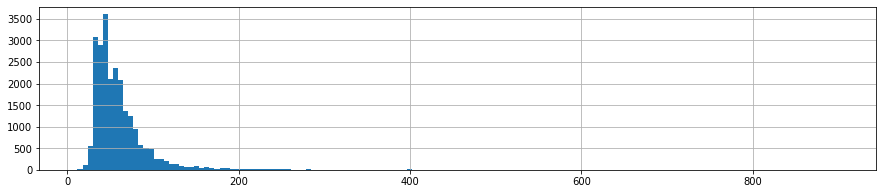

In [24]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

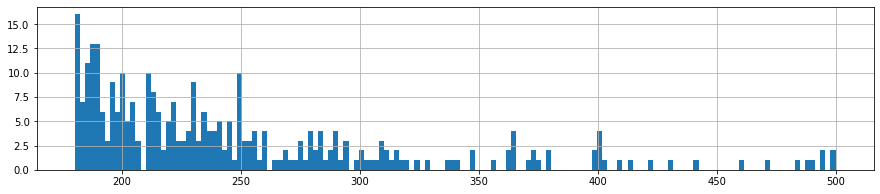

In [25]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [26]:
#Собрал всю работу над редкими и выбивающимися значениями здесь
data = data.query('rooms < 7 and rooms !=0')
data = data.query('25 < total_area < 200')
data = data.query('last_price < 25000000')
data = data.query('ceiling_height != 1.0 and ceiling_height != 5.0 and ceiling_height != 6.0 and ceiling_height != 8.0')
data = data.query('kitchen_area != 1.0 and kitchen_area != 2.0 and kitchen_area != 3.0')
data = data.query('floors_total != 1 and floors_total != 0 and floors_total < 30')
data['days_exposition'] = data['days_exposition'].fillna(0)#Заменил все NaN на 0 чтобы сохранить данные и знать какие квартиры еще не проданы 
data = data.query('days_exposition < 900')
import numpy as np
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data = data.query('kitchen_area < 30')
data.loc[data["kitchen_area"] == 0, "kitchen_area"] = np.nan
data.loc[data["days_exposition"] == 0, "days_exposition"] = np.nan
#data.isna().sum()
data.floors_total.value_counts().to_frame()
#data.info()

,floors_total
5,5509
9,3641
16,1302
12,1302
10,1102
4,1099
25,1010
17,785
6,758
3,616


In [27]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,998.00","21,998.00","13,506.00","19,078.00","21,998.00","21,998.00","21,998.00","21,998.00","21,998.00"
min,1.00,25.07,2.00,1.00,"430,000.00",2.00,4.00,1.00,2.00
max,6.00,199.20,4.00,898.00,"24,900,000.00",165.00,29.00,27.00,29.00


In [28]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,998.00","21,998.00","13,506.00","19,078.00","21,998.00","21,998.00","21,998.00","21,998.00","21,998.00"
min,1.00,25.07,2.00,1.00,"430,000.00",2.00,4.00,1.00,2.00
max,6.00,199.20,4.00,898.00,"24,900,000.00",165.00,29.00,27.00,29.00


## Посчитайте и добавьте в таблицу новые столбцы

In [29]:
data['price_one_square_meter'] = data['last_price'] / data['living_area']
data['price_one_square_meter'] = data['price_one_square_meter'].round(1)

In [30]:
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data["year"] = data["first_day_exposition"].dt.to_period("Y")

In [31]:
def categorize_floor(row):
    floor_01 = row['floor']
    floor_02 = row['floors_total']
    
    try:
        if floor_01 == floor_02:
            return 'последний'
        if floor_01 == 1:
            return 'первый'
        if floor_01 != floor_02:
            return'другой'
    except:  
        return 'x'
data['categorize_floors'] = data.apply(categorize_floor, axis=1)

In [32]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round(0)

## Проведите исследовательский анализ данных 

### Изучение параметров объектов:

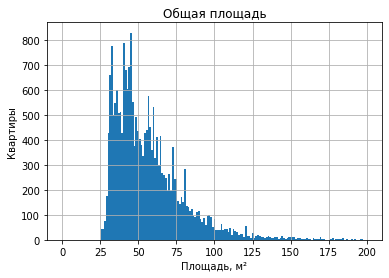

0.9158000438321439
0.5026010170902314
0.28624565364464344


In [34]:
fig, ax = plt.subplots()
data['total_area'].hist(bins=175, range=(0, 200))
ax.set_title('Общая площадь')
ax.set_xlabel('Площадь, м²')
ax.set_ylabel('Квартиры')
plt.show()
#print(data['total_area'].describe()) 
#print(data['total_area'].median())
print(data['total_area'].corr(data['living_area']))
print(data['total_area'].corr(data['kitchen_area']))
print(data['living_area'].corr(data['kitchen_area']))

In [35]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21998 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             21998 non-null  int64         
 1   last_price               21998 non-null  float64       
 2   total_area               21998 non-null  float64       
 3   first_day_exposition     21998 non-null  datetime64[ns]
 4   rooms                    21998 non-null  int64         
 5   ceiling_height           13506 non-null  float64       
 6   floors_total             21998 non-null  int64         
 7   living_area              21998 non-null  float64       
 8   floor                    21998 non-null  int64         
 9   is_apartment             21998 non-null  bool          
 10  studio                   21998 non-null  bool          
 11  open_plan                21998 non-null  bool          
 12  kitchen_area             21998 n

In [36]:
print(data['living_area'].describe())
print(data['living_area'].median())
print(data['living_area'].value_counts().sort_values(ascending=False).head(3))

count    21998.000000
mean        32.475361
std         15.947937
min          2.000000
25%         18.000000
50%         30.000000
75%         42.000000
max        165.000000
Name: living_area, dtype: float64
30.0
18.0    2325
30.0    1725
17.0    1204
Name: living_area, dtype: int64


In [37]:
# check
data.shape

(21998, 28)

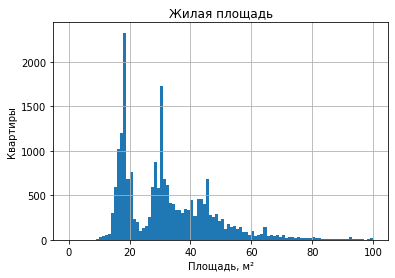

In [38]:
fig, ax = plt.subplots()
data['living_area'].hist(bins=100, range=(0, 100))
ax.set_title('Жилая площадь')
ax.set_xlabel('Площадь, м²')
ax.set_ylabel('Квартиры')
plt.show()

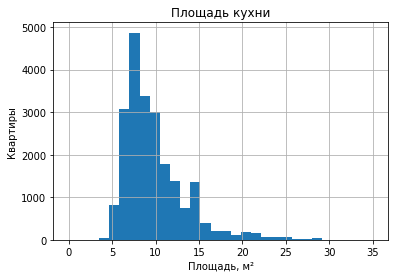

9.0


In [39]:
fig, ax = plt.subplots()
data['kitchen_area'].hist(bins=30, range=(0, 35))
ax.set_title('Площадь кухни')
ax.set_xlabel('Площадь, м²')
ax.set_ylabel('Квартиры')
plt.show()
print(data['kitchen_area'].median())
#data['kitchen_area'].describe()


In [40]:
# check
data.shape

(21998, 28)

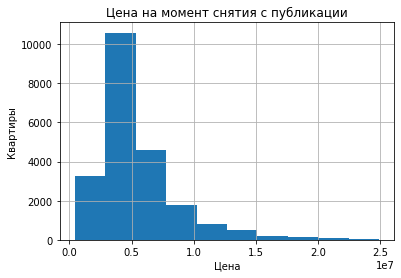

In [41]:
data['last_price'] = data['last_price'].round(0)
fig, ax = plt.subplots()
data['last_price'].hist(bins=10)
ax.set_title('Цена на момент снятия с публикации')
ax.set_xlabel('Цена')
ax.set_ylabel('Квартиры')
plt.show()

#data['last_price'].describe()

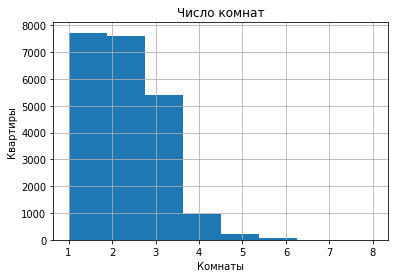

In [42]:
fig, ax = plt.subplots()
data['rooms'].hist(bins=8, range=(1, 8))
ax.set_title('Число комнат')
ax.set_xlabel('Комнаты')
ax.set_ylabel('Квартиры')
plt.show()

#data['rooms'].describe()

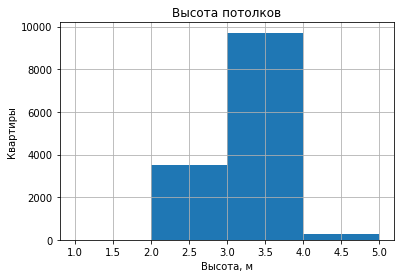

In [43]:
fig, ax = plt.subplots()
data['ceiling_height'].hist(bins=4, range=(1, 5))
ax.set_title('Высота потолков')
ax.set_xlabel('Высота, м')
ax.set_ylabel('Квартиры')
plt.show()

#data['ceiling_height'].describe()
#print(data['ceiling_height'].value_counts())

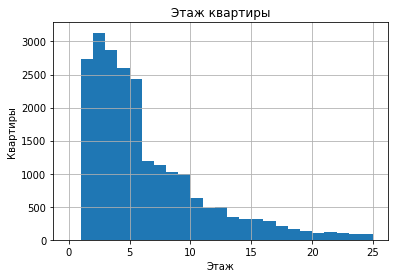

In [44]:
fig, ax = plt.subplots()
data['floor'].hist(bins=25, range=(0, 25))
ax.set_title('Этаж квартиры')
ax.set_xlabel('Этаж')
ax.set_ylabel('Квартиры')
plt.show()

#data['floor'].describe()
#print(data['floor'].value_counts().sort_values())

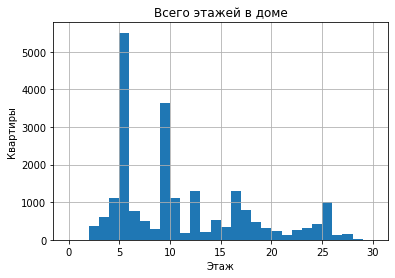

9.0
0.6773300722649802


In [45]:
fig, ax = plt.subplots()
data['floors_total'].hist(bins=30, range=(0, 30))
ax.set_title('Всего этажей в доме')
ax.set_xlabel('Этаж')
ax.set_ylabel('Квартиры')
plt.show()
data['floors_total'].describe()
print(data['floors_total'].median())
print(data['floor'].corr(data['floors_total']))

- С данными по этажности дома где продаётся квартира сильные искажения, на них лучше не полагаться.

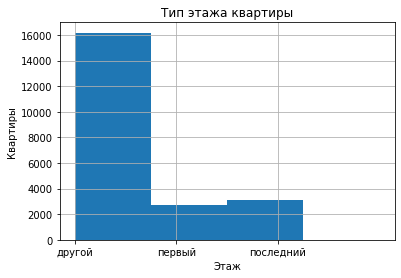

In [46]:
fig, ax = plt.subplots()
data['categorize_floors'].hist(bins=4, range=(0, 3))
ax.set_title('Тип этажа квартиры')
ax.set_xlabel('Этаж')
ax.set_ylabel('Квартиры')
plt.show()


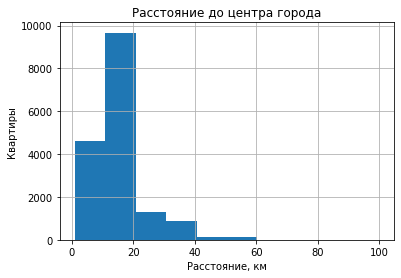

In [47]:
fig, ax = plt.subplots()
data['city_centers_nearest_km'].hist(bins=10, range=(1, 100))
ax.set_title('Расстояние до центра города')
ax.set_xlabel('Расстояние, км')
ax.set_ylabel('Квартиры')
plt.show()

#data['city_centers_nearest_km'].describe()

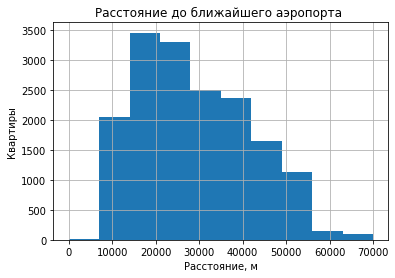

In [48]:
fig, ax = plt.subplots()
data['airports_nearest'].hist(bins=10, range=(1, 70000))
ax.set_title('Расстояние до ближайшего аэропорта ')
ax.set_xlabel('Расстояние, м')
ax.set_ylabel('Квартиры')
plt.show()

#data['airports_nearest'].describe()

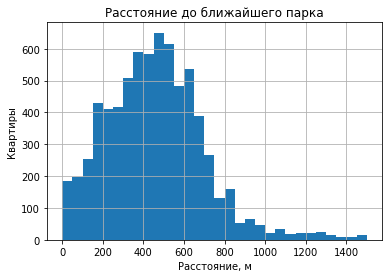

In [49]:
fig, ax = plt.subplots()
data['parks_nearest'].hist(bins=30, range=(1, 1500))
ax.set_title('Расстояние до ближайшего парка')
ax.set_xlabel('Расстояние, м')
ax.set_ylabel('Квартиры')
plt.show()

#data['parks_nearest'].describe()

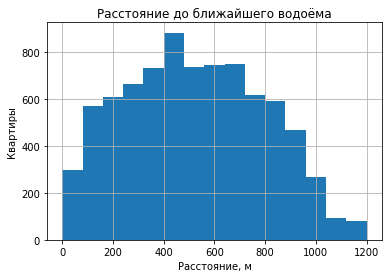

In [50]:
fig, ax = plt.subplots()
data['ponds_nearest'].hist(bins=15, range=(1, 1200))
ax.set_title('Расстояние до ближайшего водоёма')
ax.set_xlabel('Расстояние, м')
ax.set_ylabel('Квартиры')
plt.show()


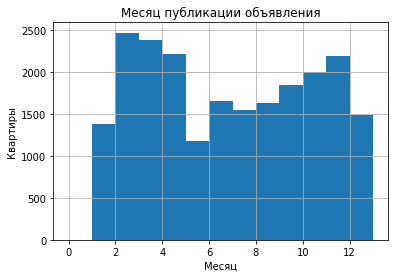

In [51]:
fig, ax = plt.subplots()
data['month'].hist(bins=13, range=(0, 13))
ax.set_title('Месяц публикации объявления')
ax.set_xlabel('Месяц')
ax.set_ylabel('Квартиры')
plt.show()

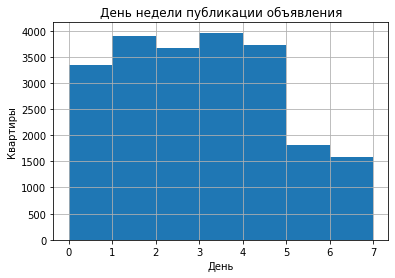

In [52]:
fig, ax = plt.subplots()
data['weekday'].hist(bins=7, range=(0, 7))
ax.set_title('День недели публикации объявления')
ax.set_xlabel('День')
ax.set_ylabel('Квартиры')
plt.show()


- Есть проблемы с площадями квартиры, у общей и у жилой площади есть большие просадки и шумы хотя выборка достаточно большая, а у площади кухни таких просадок нет, на гистограмме максимального этажа есть очень большие перепады. Остальные соответствуют нормальному распределению кроме месяца и дня недели, но они скорее зависят от выходных дней и сезона отпусков.

In [53]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,998.00","21,998.00","13,506.00","19,078.00","21,998.00","21,998.00","21,998.00","21,998.00","21,998.00"
min,1.00,25.07,2.00,1.00,"430,000.00",2.00,4.00,1.00,2.00
max,6.00,199.20,4.00,898.00,"24,900,000.00",165.00,29.00,27.00,29.00


### Изучение сколько дней проходит с появления объявления о продаже квартиры:

,floor,days_exposition_mean,days_exposition_median
8,9,146.8,83.0
5,6,156.1,89.0
4,5,163.2,90.0
6,7,157.8,90.5
1,2,160.9,92.0
3,4,161.4,92.0
2,3,163.2,96.0
7,8,160.7,102.0
0,1,182.4,113.0


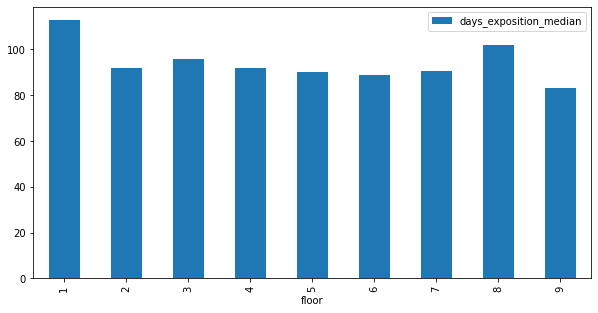

In [54]:
data_floor = data.query('floor < 10')
floor_exposition = data_floor.pivot_table(index='floor', values='days_exposition')
floor_days_exposition_01 = data_floor.pivot_table(index='floor', values='days_exposition', aggfunc='median')
floor_exposition.columns = ['days_exposition_mean']
floor_days_exposition_01.columns = ['days_exposition_median']
floor_exposition_02 = floor_exposition.join(floor_days_exposition_01)
floor_exposition_02['days_exposition_mean'] = floor_exposition_02['days_exposition_mean'].round(1)
floor_exposition_02.plot(kind='bar', y='days_exposition_median', figsize=(10, 5))
display(floor_exposition_02.reset_index().sort_values(by='days_exposition_median'))

count    15577.000000
mean       163.506965
std        176.783793
min          1.000000
25%         45.000000
50%         94.000000
75%        219.000000
max        898.000000
Name: days_exposition, dtype: float64
94.0


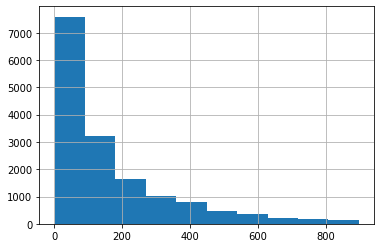

In [55]:
data_floor['days_exposition'].hist()
print(data_floor['days_exposition'].describe())
print(data_floor['days_exposition'].median())


 - Многие квартиры могут продаваться очень быстра, часта за 3-4 дня, примерна от 100 дней покупки становятся сильно реже и на 800 стремятся к 0. Наиболее быстро продаются 5, 6 и 7 этаж, первый этаж продается дольше всех. После 9 этажа выборка становится значительна меньше и по ним сложна делать выводы. Медиана 94 дня, средняя 163 из-за больших выбросов, чаще всего продажи занимают не более 100 дней. 

### Изучение факторов больше всего влияющих на общую стоимость объекта?

In [57]:
last_price_01 = data.pivot_table(index='floor', values=['last_price', 'total_area', 'living_area', 'kitchen_area' ], aggfunc='median')
#data.info()
print(last_price_01.head(10))

       kitchen_area  last_price  living_area  total_area
floor                                                   
1               8.0   3900000.0         30.0       50.56
2               9.0   4360000.0         30.0       52.00
3               9.0   4500000.0         30.0       52.00
4               9.0   4500000.0         30.0       52.00
5               8.0   4300000.0         30.0       50.40
6              10.0   4985000.0         30.0       53.00
7              10.0   4900000.0         30.0       51.00
8               9.0   4785000.0         30.0       51.00
9               9.0   4640000.0         29.0       50.05
10             10.0   4999000.0         29.0       52.30


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

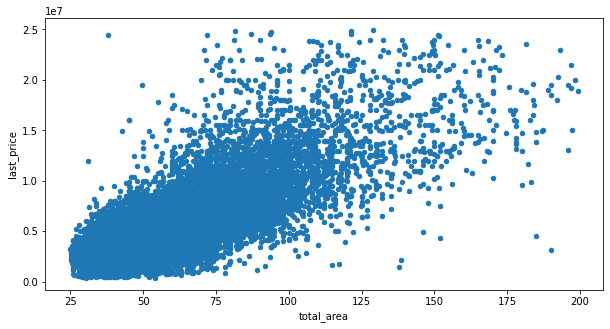

In [58]:
data.plot(kind='scatter', x='total_area', y='last_price', figsize=(10, 5)) 

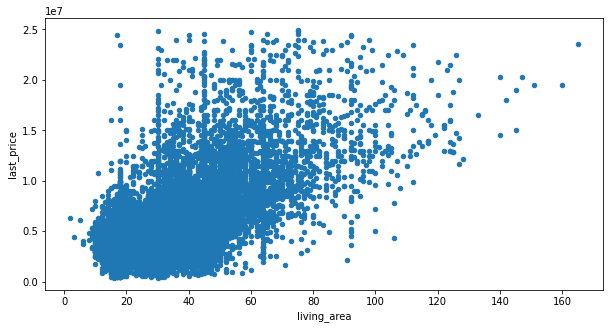

In [59]:
data.plot(kind='scatter', x='living_area', y='last_price', figsize=(10, 5)); 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

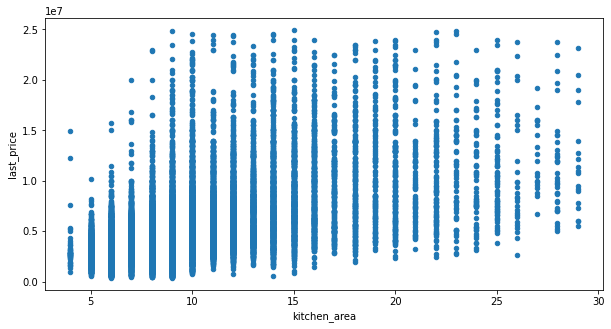

In [60]:
data.plot(kind='scatter', x='kitchen_area', y='last_price', figsize=(10, 5)) 

- Цена стоимости по площадям как видна на графиках имеет большой разброс, тут скорее всего есть искажения. Делать конкретные выводы по таким показателям нельзя. Возможна для привлечения внимания намерена завышают площадь квартиры. 

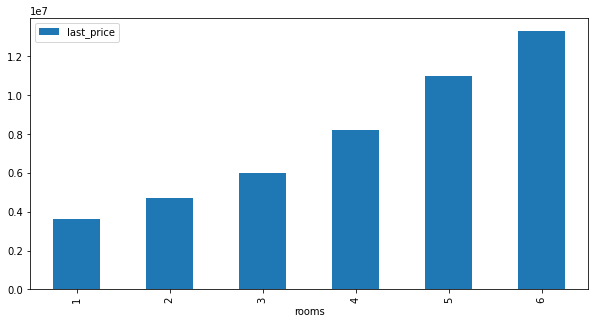

In [61]:
last_price_room = data.pivot_table(index='rooms', values=['last_price'], aggfunc='median')
#data.plot(kind='scatter', x='rooms', y='last_price', figsize=(10, 5)) 
last_price_room.plot(kind='bar', y='last_price', figsize=(10, 5));

- Чем больше комнат тем больше цена, но из-за разности выборки сложна будет оценить этот разрыв на данных с большим количеством комнат, сравнивать квартиры можно только с одной до четырех комнат.

<AxesSubplot:xlabel='floor'>

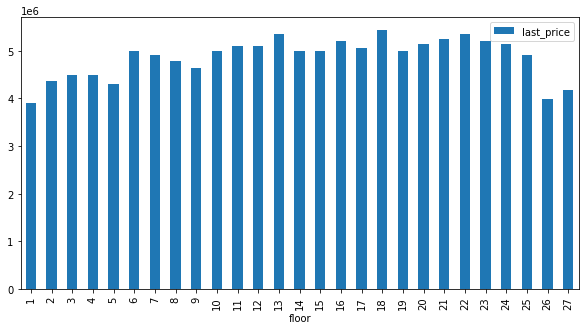

In [62]:
last_price_01.plot(kind='bar', y='last_price', figsize=(10, 5))

                   last_price
categorize_floors            
другой              4750000.0
первый              3900000.0
последний           4200000.0


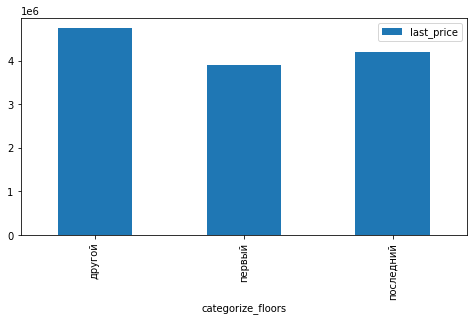

In [63]:
last_price_floors = data.pivot_table(index='categorize_floors', values=['last_price'], aggfunc='median')
last_price_floors.plot(kind='bar', y='last_price', figsize=(8, 4));
print(last_price_floors) 

- Первый этаж является самым не популярным, cложна делать выводы по последнему этажу тут есть сильные искажения. 

,weekday,last_price
1,1,4650000.0
2,2,4600000.0
0,0,4595000.0
3,3,4540000.0
4,4,4500000.0
5,5,4500000.0
6,6,4500000.0


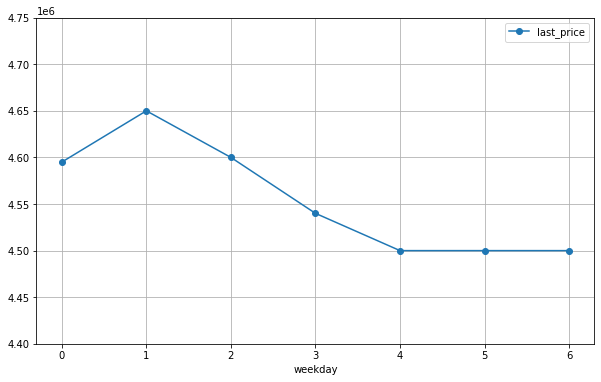

In [64]:
last_price_weekday = data.pivot_table(index='weekday', values=['last_price'], aggfunc='median').reset_index()
last_price_month = data.pivot_table(index='month', values=['last_price'], aggfunc='median').reset_index()
last_price_year = data.pivot_table(index='year', values=['last_price'], aggfunc='median')
groupby_year = data.pivot_table(index='year', values=['last_price'], aggfunc='count')
groupby_year.columns = ['count']
last_price_year = last_price_year.join(groupby_year).reset_index()
last_price_weekday.plot(x='weekday', y='last_price', style='o-', ylim=(4400000, 4750000), grid=True, figsize=(10, 6))
display(last_price_weekday.sort_values(by='last_price', ascending=False))

- Ближе к выходном дням и на самих выходных люди предпочитают выкладывать предложения с более низкой ценой. Стоимость квартир повышается с понедельника на вторник и дальше снижается.

In [65]:
#last_price_month.plot(kind='bar', y='last_price', figsize=(10, 7))
display(last_price_month.sort_values(by='last_price', ascending=False).head(10))

,month,last_price
3,4,4700000.0
8,9,4650000.0
10,11,4617500.0
1,2,4600000.0
11,12,4600000.0
2,3,4581000.0
0,1,4550000.0
6,7,4550000.0
7,8,4500000.0
9,10,4500000.0


<AxesSubplot:xlabel='month'>

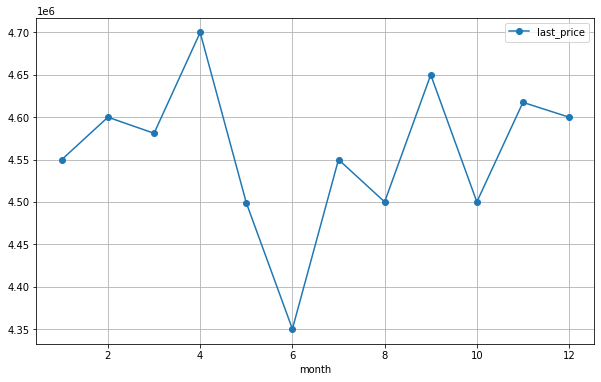

In [66]:
last_price_month.plot(x='month', y='last_price', style='o-',  grid=True, figsize=(10, 6))

- К середине года цены сильно проседают, но постепенно возвращаются к своим показателям к концу. Наибольшую цену они имеют в апреле.

In [67]:
display(last_price_year.sort_values(by='last_price',  ascending=False))

,year,last_price,count
0,2014,7282500.0,64
5,2019,5000000.0,2720
1,2015,4980000.0,844
4,2018,4530000.0,8105
3,2017,4480000.0,7715
2,2016,4445000.0,2550


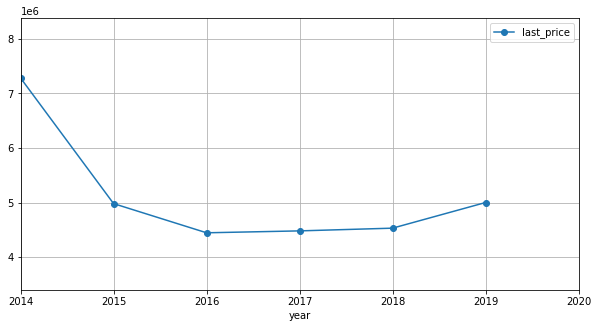

In [68]:
last_price_year.plot(x='year', y='last_price', style='o-', xlim=(44, 50), ylim=(3400000, 8382500),  grid=True, figsize=(10, 5));

- В 2014 году цены были наиболее высокие, но наблюдений недостаточно нельзя делать окончательные выводы тут нужна больше выборки и дополнительные исследования, наиболее низкие цены были в 2016 году после чего снова начали расти. 

### Изучение цены одного квадратного метра и числа объявлений.

In [69]:
locality_name_median = data.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc='median')
locality_name_price = data.pivot_table(index='locality_name', values=['days_exposition'], aggfunc= 'count')
locality_name_square_meter = locality_name_median.join(locality_name_price)
locality_name_square_meter['price_one_square_meter'] = locality_name_square_meter['price_one_square_meter'].round(1)
locality_name_square_meter = locality_name_square_meter.query('days_exposition > 50')
display(locality_name_square_meter.sort_values(by='days_exposition', ascending=False).head(10))

,price_one_square_meter,days_exposition
locality_name,,
Санкт-Петербург,187500.0,12536
посёлок Мурино,173333.3,490
посёлок Шушары,144444.4,393
Всеволожск,125000.0,323
Колпино,125294.1,303
посёлок Парголово,199750.0,293
Пушкин,179562.5,287
деревня Кудрово,188888.9,265
Гатчина,116888.9,262


<AxesSubplot:>

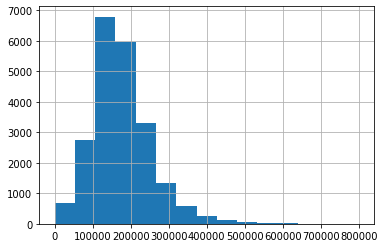

In [70]:
data['price_one_square_meter'].hist(bins=15, range=(0, 800000))

- Если брать выборку начиная с 50 то самая низкое стоимостью квадратного метра в Сланцах, а самая высокая в Кудрово. 

### Изучение зависимости стоимости объектов от расстояния до центра города.

In [71]:
locality_name_centers_01 = (data[data['locality_name'] == 'Санкт-Петербург'])
locality_name_centers_sp = locality_name_centers_01.pivot_table(index='city_centers_nearest_km', columns='locality_name', values='price_one_square_meter')
locality_name_centers_sp =locality_name_centers_sp.reset_index()
locality_name_centers_sp['price_centers_nearest'] = locality_name_centers_sp['Санкт-Петербург'] / locality_name_centers_sp['city_centers_nearest_km']
locality_name_centers_sp.rename(columns={'Санкт-Петербург' : 'price_one_square_m'}, inplace = True)
locality_name_centers_sp['price_centers_nearest'] = locality_name_centers_sp['price_centers_nearest'].round(1)
data_count = data.groupby('city_centers_nearest_km')['city_centers_nearest_km'].count()
locality_name_centers_sp['price_one_square_m'] = locality_name_centers_sp['price_one_square_m'].round(1)
display(locality_name_centers_sp.sort_values(by='city_centers_nearest_km', ascending=False).head(10))
display(data_count.sort_values(ascending=False).head(10))

locality_name,city_centers_nearest_km,price_one_square_m,price_centers_nearest
29,29.0,138698.7,4782.7
28,28.0,172216.5,6150.6
27,27.0,309479.2,11462.2
26,26.0,209915.9,8073.7
25,25.0,190492.2,7619.7
24,24.0,187360.9,7806.7
23,23.0,173505.6,7543.7
22,22.0,185685.8,8440.3
21,21.0,187441.9,8925.8
20,20.0,150316.0,7515.8


city_centers_nearest_km
12.0    1542
15.0    1507
13.0    1395
16.0    1231
14.0    1220
11.0    1120
17.0     857
5.0      737
10.0     686
4.0      596
Name: city_centers_nearest_km, dtype: int64

13698.396551724138


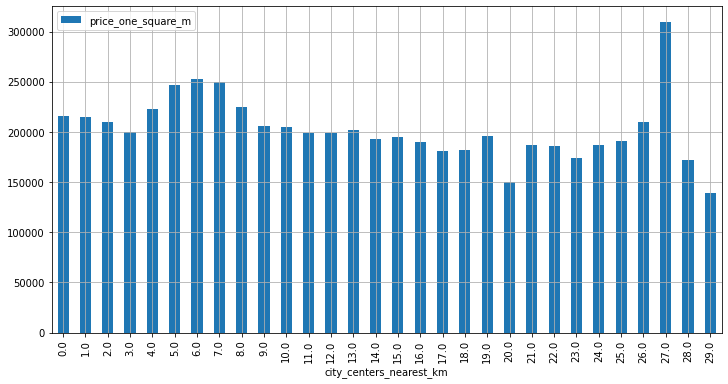

In [72]:
locality_name_centers_sp.plot(kind='bar', x='city_centers_nearest_km', y='price_one_square_m', style='o', grid=True, figsize=(12, 6))
x = locality_name_centers_sp['price_one_square_m'].median() 
y = locality_name_centers_sp['city_centers_nearest_km'].median()
print(x / y)

- Средняя цена километра 13000 за один квадратный метр. Цена квартиры увеличивается по мере приближения к центру, но люди видимо предпочитают все таки покупать квартиры на небольшом удалении нежили прилегающие в плотную к центру. Двадцать седьмой километр сильно выбивается, возможна есть проблемы с самими данными.

## Общий вывод

Из проведённого исследования можно сделать выводы что:
 - Возможна данные по площади квартиры и максимальному этажу в доме часта искажаются. Нужна обращать внимания на слишком низкие цены и большие площади и то сколько этажей в доме.
 - На цену сильна влияют количество комнат и удаленность квартиры от центра. Также значение имеет этаж, не популярными являются первые этажи их цена наиболее низкая, сложна сказать являются данные по последним этажам достоверными.
 - К середине года цены падают, но постепенно возвращаются к своим показателям к концу. Стоимость квартир повышается с понедельника на вторник и дальше снижается.
 - Наиболее низкие цены были в 2016 году после чего снова начали расти, по 2014 году наблюдений недостаточно, нельзя делать окончательные выводы тут нужна больше выборки и дополнительные исследования.
 - Больше всего предложений в Санкт-Петербурге, самая низкое стоимостью квадратного метра в Сланцах, а самая высокая в Кудрово.